поиск лучшего варианта расчета центра скопления точек (отражений от опоры)

In [5]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import MultiPoint, Point, Polygon

In [3]:
%matplotlib inline

<AxesSubplot:>

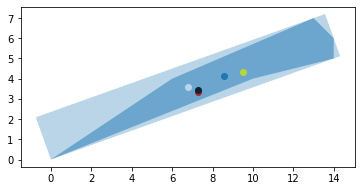

In [9]:
c2 = ([(0,0), (6,4), (13,7), (14,6), (14,5), (10,4)])
c2m = Point(np.mean(c2, axis=0))
polygon1 = Polygon(c2)
p = gpd.GeoSeries(polygon1)
cc = p.convex_hull
cc2 = cc.buffer(5)
cc3 = cc2.centroid
bu = p.buffer(5)
c1 = p.centroid

rect = MultiPoint(c2).minimum_rotated_rectangle
rect_c = rect.centroid

ax = p.plot(alpha=0.5)
c1.plot(ax=ax)
cc3.plot(ax=ax, color='red')
#bu.plot(ax=ax, alpha=0.5)
bu1 = bu.centroid
bu1.plot(ax=ax, color='black')
gpd.GeoSeries(c2m).plot(ax=ax, color='yellow')
gpd.GeoSeries(rect_c).plot(ax=ax, color='white')
gpd.GeoSeries(rect).plot(ax=ax, alpha=0.3)

вывод - стоит использовать буфер вокруг фигуры .buffer() или .convex_hull - описывающую фигуру + буфер вокруг нее. результат примерно одинаковый.  
учитывая что мы имеем дело с массивом точек, полигон по которым строится не пойми какой, желательно использовать .convex_hull, т.к. там идет упрощение фигуры.   
также имеет значение выбор размера буфера - он не должен быть больше самой фигуры, желательно половину от меньшей разницы по одной из осей

также интересный вариант - строить описывающий прямоугольник с его центроидом. этот вариант в некоторых случаях может дааже быть точнее, но при условии хороших отражений от опор